In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/2020.2_Machine_Learning/abalone_dataset.csv')

df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [ ]:
df['type'].value_counts() # Contagem de quantas amostras de cada tipo existem no dataframe

1    1078
3    1051
2    1003
Name: type, dtype: int64

In [ ]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
type                int64
dtype: object

In [ ]:
#Converter as strings da coluna 'sex' para números
# 1 - M
# 2 - F
# 3 - I

df = df.replace(to_replace='M', value='1', regex=True)
df = df.replace(to_replace='F', value='2', regex=True)
df = df.replace(to_replace='I', value='3', regex=True)

df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,1,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,3,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,3,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,1,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,3,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


# Analizando relações entre os atributos

In [ ]:
import seaborn as sns

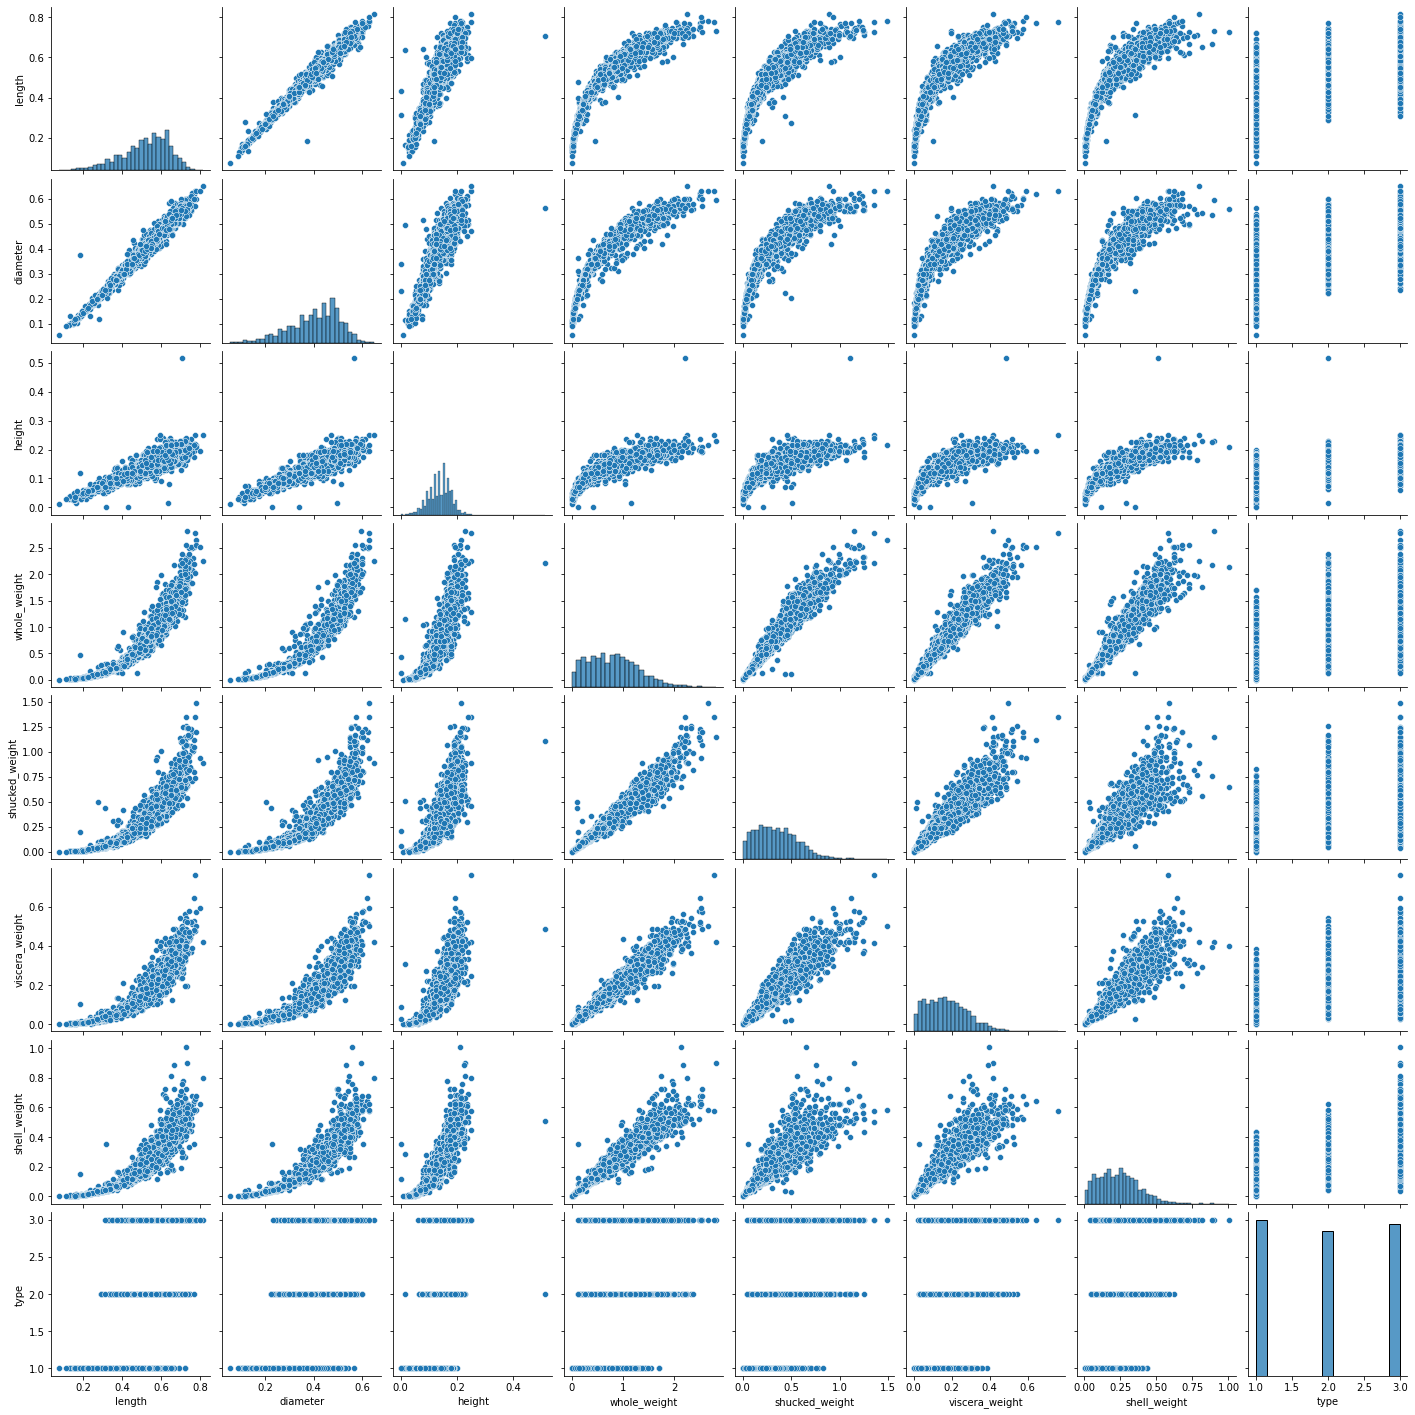

In [ ]:
sns.pairplot(df)

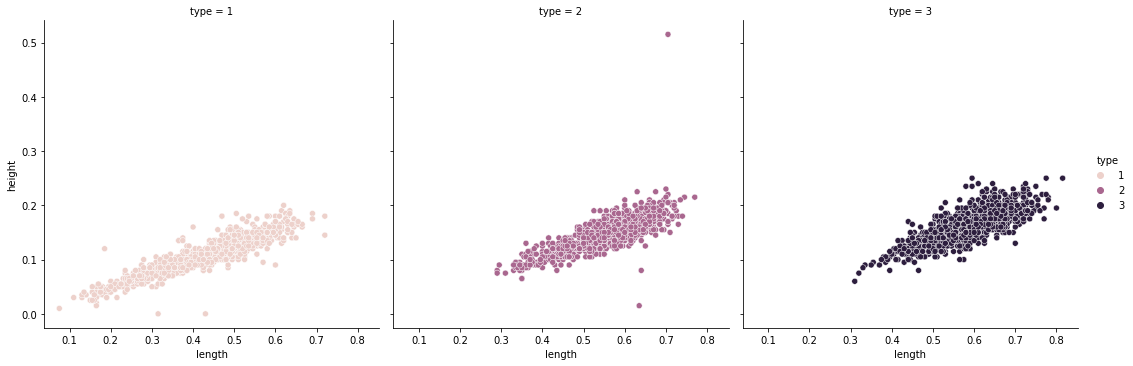

In [ ]:
sns.relplot(data=df, x=df['length'], y=df['height'], hue=df['type'], col=df['type'])

# Classificadores


In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df_teste = pd.read_csv('/content/drive/My Drive/2020.2_Machine_Learning/abalone_app.csv')

df_teste.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,F,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,F,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,M,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,F,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [ ]:
#Converter as strings da coluna 'sex' para números
# 1 - M
# 2 - F
# 3 - I

df_teste = df_teste.replace(to_replace='M', value='1', regex=True)
df_teste = df_teste.replace(to_replace='F', value='2', regex=True)
df_teste = df_teste.replace(to_replace='I', value='3', regex=True)

df_teste.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,1,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,2,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,2,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,1,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,2,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [ ]:
x = df[['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']]
y = df['type']

In [ ]:
# SVM
classifier_SVC = svm.SVC(kernel='sigmoid')
classifier_SVC.fit(x,y)
df_predict_svm = classifier_SVC.predict(df_teste)


In [ ]:
classifier_SVC.score(x, y)

0.4173052362707535

In [ ]:
# Gaussian Naive Bayes

classf_gnb = GaussianNB()
fitted_text_gnb = classf_gnb.fit(x, y)
df_predict_sgnb = classf_gnb.predict(df_teste)

In [ ]:
classf_gnb.score(x, y)

0.5769476372924649

# Requisição

In [ ]:
import requests

In [ ]:
URL = "https://aydanomachado.com/mlclass/03_Validation.php"
DEV_KEY = "Remnants of Megalovania"
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(df_predict_svm).to_json(orient='values')}
r = requests.post(url = URL, data = data)
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"Remnants of Megalovania","accuracy":0.615311004784689,"old_accuracy":0} 

